# **Principle Component Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('SIT720.2-Step2.15-dataset5DGaussian.csv',delimiter=',', header=None).values
print(data.shape)

(200, 5)


In [ ]:
#normalization 
from sklearn.preprocessing import scale
Xnorm = scale(data)
print(Xnorm)

In [ ]:
#implementing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(Xnorm)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#see the variance
var=pca.explained_variance_ratio_
print(var)

[0.83743065 0.09909097 0.0345153  0.01793089 0.01103218]


[83.74 93.65 97.1  98.89 99.99]


Text(0, 0.5, 'Variance captured')

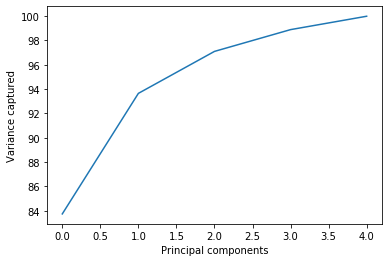

In [ ]:
#calculate cummulative variance

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")


So, if k is the number of principal components, we see that k=1
k
=
1
 captures around 84%
84
%
 variance, k=2
k
=
2
 (the first 2
2
 components together) capture around 94%
94
%
variance and so on. Since k=2
k
=
2
 captures more than 90%
90
%
 variance in our data, lets drop the third, fourth and fifth components.

In [ ]:
pca = PCA(n_components=2)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)

(200, 2)


In [ ]:
#reconstruction error
# Reconstruct our data
Xrec = pca.inverse_transform(Zred)
print(Xrec.shape)


# Measure the reconstruction error
rec_error = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print(rec_error)

(200, 5)
0.25194914484908526


# **Influence of Dimensionality Reduction on Reconstruction error**

Let us see how dropping the dimensionality of data affects the reconstruction error. We perform PCA using increasing number of principal components, and measure the reconstruction error in each case.


In [ ]:
nSamples, nDims = Xnorm.shape

# vary principal components from 1 to 5
n_comp = range(1,nDims+1)
print(n_comp)

range(1, 6)


k=1, rec_error=0.4031988912398407
k=2, rec_error=0.25194914484908526
k=3, rec_error=0.17018541021846642
k=4, rec_error=0.10503420093051853
k=5, rec_error=5.512638116475688e-16


Text(0, 0.5, 'Reconstruction Error')

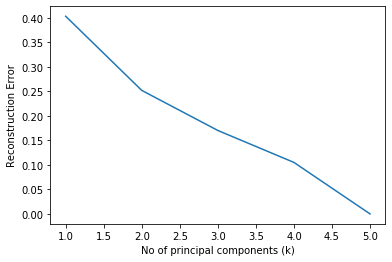

In [ ]:
# Initialize vector of rec_error
rec_error = np.zeros(len(n_comp)+1)

for k in n_comp:
    pca = PCA(n_components=k)
    Zred = pca.fit_transform(Xnorm)
    Xrec = pca.inverse_transform(Zred)
    rec_error[k] = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
    print("k={}, rec_error={}".format(k, rec_error[k]))

rec_error = rec_error[1:] #we started recording from index 1, so drop index 0


#Visualize the change in error
plt.plot(n_comp,rec_error)
plt.xlabel('No of principal components (k)')
plt.ylabel('Reconstruction Error')